In [198]:
from sqlalchemy import create_engine
import pandas as pd
import yaml
from urllib.parse import quote_plus
import numpy as np

In [199]:
def import_credentials(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [200]:
class RDSDatabaseConnector:
    def __init__(self, data):
        self.data = data
        self.engine= None

    def initialize_engine(self):
        HOST = quote_plus(self.data['RDS_HOST'])
        USER = quote_plus(self.data['RDS_USER'])
        PASSWORD = self.data['RDS_PASSWORD']
        DATABASE = self.data['RDS_DATABASE']
        PORT = self.data['RDS_PORT']
                
        # Create the connection URL for SQLAlchemy
        connection_url = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
        
        # Create SQLAlchemy engine
        self.engine = create_engine(connection_url)
        print("Engine initialized successfully.")
    
    def extract_data(self, table_name="loan_payments"):
        if self.engine is None:
            raise ValueError("Engine not initialized. Please call 'initialize_engine' first.")
        
        # Query the table and load data into a Pandas DataFrame
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql(query, self.engine)
        return df

    def save_data_to_csv(self, data, file_name="loan_payments_data.csv"):
        data.to_csv(file_name, index=False)
        print(f"Data saved to {file_name}.")

In [201]:
data = import_credentials('C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/credentials.yaml')
db_connector = RDSDatabaseConnector(data)
db_connector.initialize_engine()
data_extract = db_connector.extract_data()
db_connector.save_data_to_csv(data_extract, 'loan_payments_data.csv')

Engine initialized successfully.
Data saved to loan_payments_data.csv.


In [202]:
def load_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data successfully loaded from {file_path}.")
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} does not exist.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file at {file_path} is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: There was an issue parsing the file at {file_path}.")
        return None


In [220]:
data = load_data_from_csv("C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/loan_payments_data.csv")
if data is not None:
    #print(data.head())

Data successfully loaded from C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/loan_payments_data.csv.


In [221]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [222]:
class DataTransform:
    def __init__(self, dataframe):
        self.df = dataframe
        
    def numeric_no_string(self, column):
         self.df[column] = self.df[column].str.extract(r'(\d+)').astype(float)
        
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column], format='%b-%Y', errors='raise')
    
    def convert_to_categorical(self, column):
        self.df[column] = self.df[column].astype('category')

    def convert_to_boolean(self, column):
        self.df[column] = self.df[column].astype('boolean')
    
    def remove_currency_symbols(self, column):
        self.df[column] = self.df[column].replace({'\$': '', '€': '', '£': '', ',': ''}, regex=True)
        self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def strip_excess_whitespace(self, column):    
        self.df[column] = self.df[column].str.strip()

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1625514955.py:18: SyntaxWarning: invalid escape sequence '\$'
  self.df[column] = self.df[column].replace({'\$': '', '€': '', '£': '', ',': ''}, regex=True)


In [223]:
new_df = data

In [224]:
#term should be an interger
#employment length should be an interger
#issue date should be datetime
#last payment date should be datetime
#drop mths_since_last_major_derog 
#drop mths_since_last_record 

DataTransform(new_df).numeric_no_string('term')
DataTransform(new_df).numeric_no_string('employment_length')
DataTransform(new_df).convert_to_datetime('issue_date')
DataTransform(new_df).convert_to_datetime('last_payment_date')
DataTransform(new_df).convert_to_datetime('next_payment_date')
DataTransform(new_df).convert_to_datetime('last_credit_pull_date')
DataTransform(new_df).convert_to_categorical('loan_status')

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

In [225]:
class DataFrameInfo:
    def __init__(self, dataframe):
        self.df = dataframe
        
    def describe_columns(self):
        print("Column Descriptions:\n")
        print(self.df.info())
    
    def get_statistics(self):
        print("Column Statistics:\n")
        print(self.df.describe())
    
    def count_distinct_values(self):
        categorical_cols = self.df.select_dtypes(include='category').columns
        distinct_counts = {}
        for col in categorical_cols:
            distinct_counts[col] = self.df[col].nunique()
        return pd.Series(distinct_counts)
    
    def get_column_unique_values(self):
        unique_vals = {}
        for col in self.df.columns:
            unique_vals[col] = self.df[col].unique()
        return unique_vals
    
    def get_shape(self):
        return self.df.shape
    
    def count_nulls(self):
        null_counts = self.df.isnull().sum()
        null_percentage = (self.df.isnull().mean() * 100)
        null_summary = pd.DataFrame({
            'null_count': null_counts,
            'null_percentage': null_percentage
        })
        return null_summary
    
    def get_column_value_counts(self):
        categorical_cols = self.df.select_dtypes(include='category').columns
        value_counts = {}
        for col in categorical_cols:
            value_counts[col] = self.df[col].value_counts()
        return value_counts

In [ ]:
info = DataFrameInfo(new_df)
info.get_column_data_types()

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [350]:
class Plotter:
    def __init__(self, df):
        self.df = df

    def plot_missing_data_heatmap(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title("Missing Data Heatmap")
        plt.show()

    def plot_correlation_matrix(self, correlation_matrix):
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Correlation Matrix")
        plt.show()
    
    def plot_missing_data_percentage(self, missing_data):
        plt.figure(figsize=(10, 6))
        missing_data.plot(kind='bar', color='salmon')
        plt.title("Percentage of Missing Values per Column")
        plt.ylabel("Percentage of Missing Data (%)")
        plt.show()
    
    def plot_histograms(self, columns):
        for column in columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.df[column], kde=True, bins=30)
            plt.title(f'Distribution of {column}')
            plt.show()
    
    def plot_skewed_data(self, columns):
        skew_values = self.df[columns].skew()
        skewed_cols = skew_values[skew_values > 1].index.tolist()
        self.plot_histograms(skewed_cols)
    
    def plot_qq(self, data, title='QQ Plot'):
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(title)
        plt.show()
    
    def plot_box(self):
        numeric_df = self.df.select_dtypes(include=['number'])
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=numeric_df)
        plt.xticks(rotation=90)
        plt.show()
    

In [477]:
class DataFrameTransform:
    def __init__(self, df):
        self.df = df
    
    def check_missing_values(self):
        missing_data = self.df.isnull().sum() / len(self.df) * 100
        missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
        return missing_data
    
    def drop_columns_with_missing_values(self, threshold=50):
        missing_data = self.check_missing_values()
        columns_to_drop = missing_data[missing_data > threshold].index
        self.df.drop(columns=columns_to_drop, inplace=True)
    
    def impute_missing_values(self, strategy='mean'):
        # Check for numeric columns
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            if self.df[column].isnull().sum() > 0:
                if strategy == 'mean':
                    self.df[column].fillna(self.df[column].mean(), inplace=True)
                elif strategy == 'median':
                    self.df[column].fillna(self.df[column].median(), inplace=True)
        # Check for datetime columns
        date_columns = self.df.select_dtypes(include=['datetime64']).columns
        for column in date_columns:
            if self.df[column].isnull().sum() > 0:
                mode_date = self.df[column].mode()[0]
                self.df[column].fillna(mode_date, inplace=True)
    
    def identify_skewed_columns(self, threshold=1.0):
        numeric_df = self.df.select_dtypes(include=['number'])
        skewness = numeric_df.skew()
        skewed_cols = skewness[skewness.abs() > threshold].index
        return skewed_cols, skewness

    def transform_skewed_columns(self, skewed_cols, method='log'):
        for col in skewed_cols:
            if method == 'log':
                self.df[col] = np.log(self.df[col] + 1)
            elif method == 'sqrt':
                self.df[col] = np.sqrt(self.df[col])
            elif method == 'boxcox':
                self.df[col], _ = stats.boxcox(self.df[col] + 1)
            else:
                raise ValueError(f"Unsupported transformation method: {method}")   
        return self.df
    
    def remove_outliers(self):
        numeric_df = self.df.select_dtypes(include=['number'])

        for col in numeric_df.columns:
            # Calculate Q1, Q3, and IQR
            Q1 = numeric_df[col].quantile(0.15)
            Q3 = numeric_df[col].quantile(0.85)
            IQR = Q3 - Q1
           
            # Define the bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers by filtering values outside the bounds
            self.df = self.df[(self.df[col] >= lower_bound) & (self.df[col] <= upper_bound)]       
        return self.df
    
    def correlation_matrix(self):
        numeric_df = self.df.select_dtypes(include=['number'])
        correlation_matrix = numeric_df.corr()
        return correlation_matrix
    
    def remove_highly_correlated_columns(self, threshold=0.9):
        numeric_df = self.df.select_dtypes(include=['number'])
        correlation_matrix = numeric_df.corr()
        upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        columns_to_drop = [
        column for column in upper_triangle.columns
        if any(abs(upper_triangle[column]) > threshold)
        ]
        numeric_df = numeric_df.drop(columns=columns_to_drop)
        return numeric_df


In [412]:
transformer = DataFrameTransform(new_df)
plotter = Plotter(new_df)

In [ ]:
missing_data = transformer.check_missing_values()
print("Missing Values Percentage:\n", missing_data)

In [ ]:
plotter.plot_missing_data_percentage()
plotter.plot_missing_data_heatmap()

In [337]:
transformer.drop_columns_with_missing_values(threshold=50)
    
transformer.impute_missing_values(strategy='median')

In [338]:
new_df.to_csv("cleaned_data.csv", index=False)

In [ ]:
info = DataFrameInfo(new_df)
info.count_nulls()

In [500]:
skew_df = pd.read_csv('cleaned_data.csv')
skew_processor = DataFrameTransform(skew_df)

In [501]:
# Step 1: Identify skewed columns
skewed_cols, skewnesss = skew_processor.identify_skewed_columns(threshold=0.75)
print(skewed_cols)
print(skewnesss)

Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'term', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_amount',
       'collections_12_mths_ex_med'],
      dtype='object')
id                             2.370336
member_id                      2.205422
loan_amount                    0.805259
funded_amount                  0.869922
funded_amount_inv              0.813927
term                           1.148358
int_rate                       0.456515
instalment                     0.996981
employment_length             -0.038738
annual_inc                     8.711831
dti                            0.189420
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_account

In [502]:
# Visualize skewed columns
plotter.plot_qq(skewed_cols)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
plotter.plot_skewed_data(skewed_cols)

In [503]:
# Step 2: Apply transformations to skewed columns
skew_processor.transform_skewed_columns(skewed_cols, 'boxcox')

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,56.325972,66.101219,67.908415,71.726144,119.794516,0.13996,7.49,16.115054,A,A4,...,12.042268,0.000000,0.000000,0.000000,2022-01-01,5.189973,2022-01-01,0.0,1,INDIVIDUAL
1,56.322113,66.096228,81.878603,86.809464,150.204271,0.13996,6.99,19.556798,A,A3,...,13.525567,0.000000,0.000000,0.000000,2022-01-01,5.621638,2022-01-01,0.0,1,INDIVIDUAL
2,56.322104,66.096217,87.951843,93.385129,163.807144,0.13996,7.49,21.122604,A,A4,...,13.689241,0.000000,0.000000,0.000000,2021-10-01,8.517393,2021-10-01,0.0,1,INDIVIDUAL
3,56.322099,66.096211,85.867255,91.126910,159.113337,0.13996,14.31,21.401238,C,C4,...,14.199200,0.000000,0.000000,0.000000,2021-06-01,8.580717,2021-06-01,0.0,1,INDIVIDUAL
4,56.322097,66.096209,85.867255,91.126910,159.113337,0.13996,6.03,20.434096,A,A1,...,13.447401,0.000000,0.000000,0.000000,2022-01-01,5.720426,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,23.042592,25.178719,56.901995,59.890560,60.277314,0.13996,9.01,13.454280,B,B2,...,13.228281,0.000000,0.000000,0.000000,2016-07-01,4.803646,2016-07-01,0.0,1,INDIVIDUAL
54227,25.398503,25.074993,56.901995,59.890560,68.575820,0.13996,10.59,13.581326,C,C2,...,13.697006,0.103884,0.000000,0.000000,2016-10-01,5.781842,2016-09-01,0.0,1,INDIVIDUAL
54228,24.631359,24.858957,49.708862,52.182177,66.877229,0.13996,7.43,11.494266,A,A2,...,11.363963,0.000000,0.000000,0.000000,2016-09-01,4.472062,2013-05-01,0.0,1,INDIVIDUAL
54229,23.589984,24.842472,56.901995,59.890560,22.768219,0.13996,7.43,13.327029,A,A2,...,8.827915,0.000000,0.000000,0.000000,2014-03-01,0.000000,2013-05-01,0.0,1,INDIVIDUAL


In [ ]:
# Step 4: Visualize the transformed data
plotter.plot_skewed_data(skewed_cols)

In [510]:
plotter = Plotter(skew_df)
transformer = DataFrameTransform(skew_df)

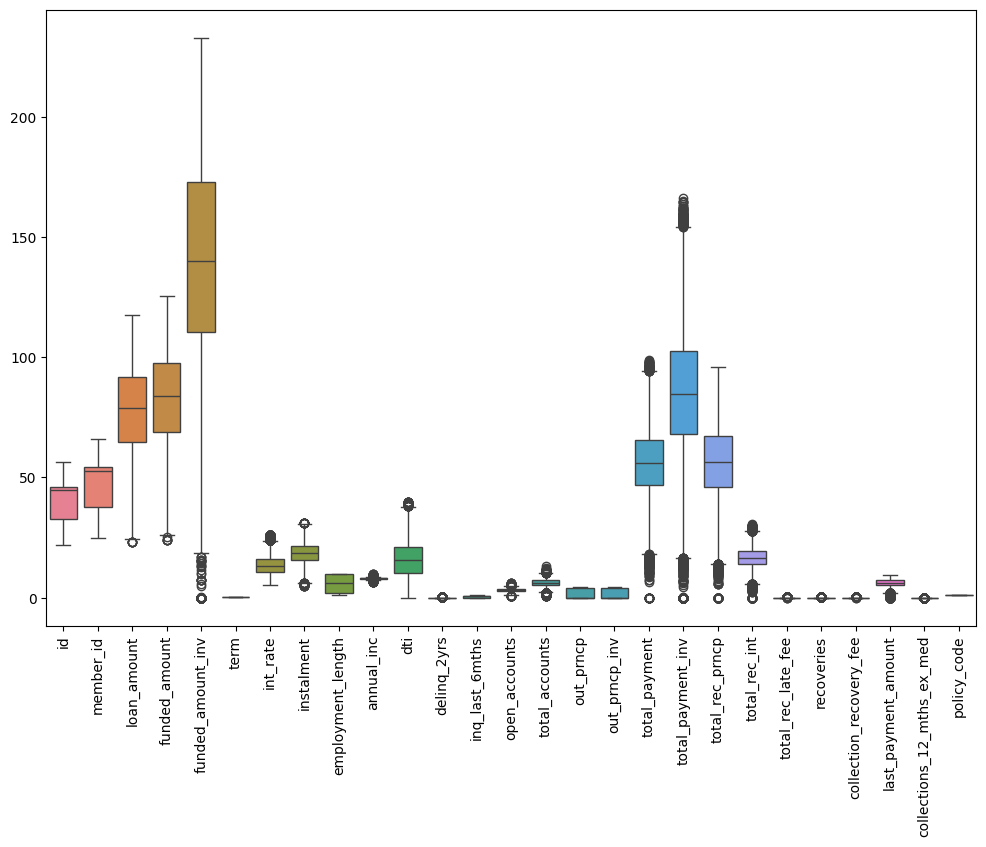

In [505]:
#Task 5 visualise outliers
plotter.plot_box()

In [482]:
#Remove outliers
df_without_outliers = transformer.remove_outliers()

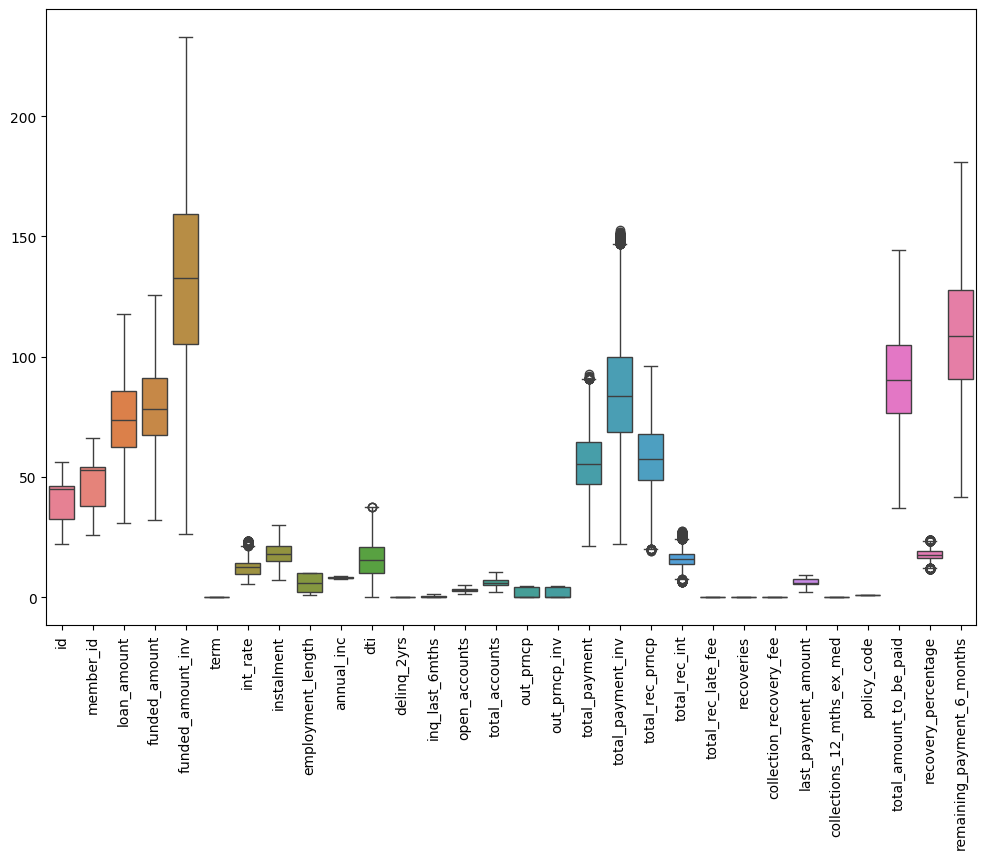

In [ ]:
#View new box plot with removed outliers
plotter = Plotter(df_without_outliers)
plotter.plot_box()

In [506]:
#Task 6 compute correlation matrix
plotter = Plotter(df_without_outliers)
transformer = DataFrameTransform(df_without_outliers)
correlation_matrix = transformer.correlation_matrix()

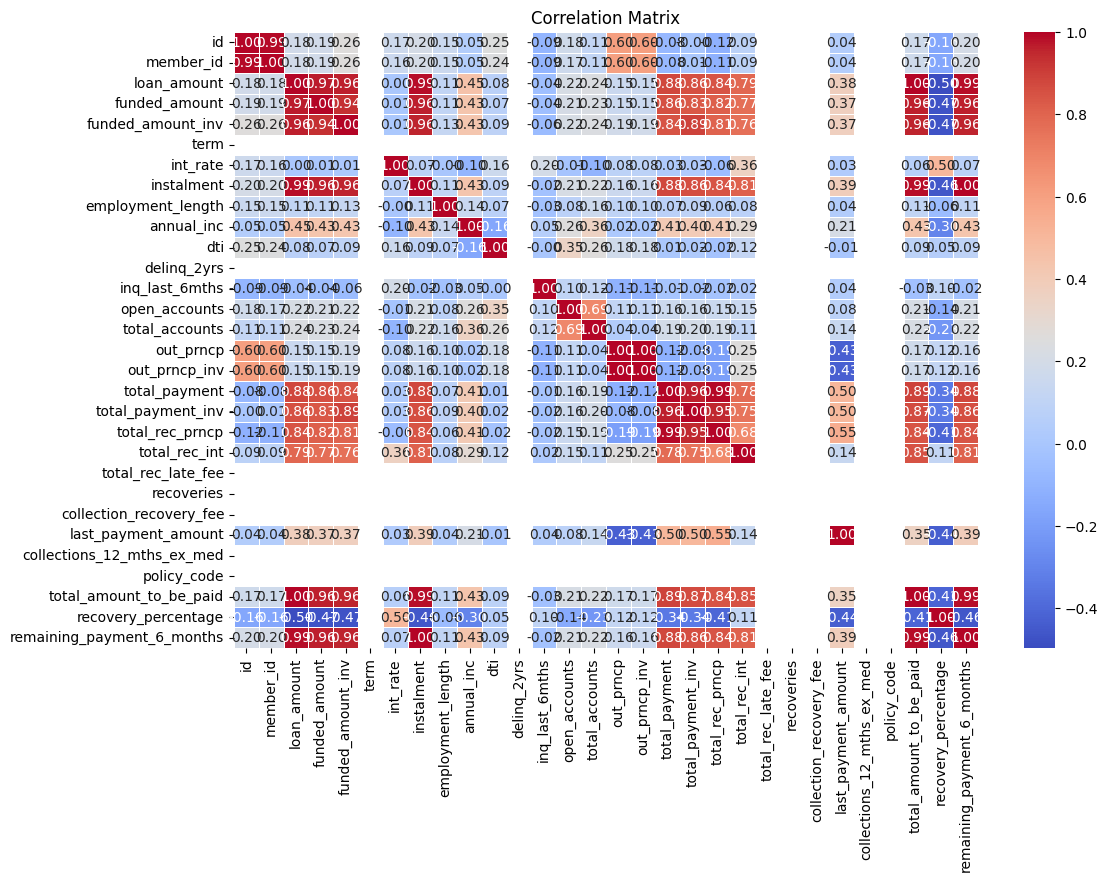

In [507]:
#visualise correlation matrix
plotter.plot_correlation_matrix(correlation_matrix)

In [511]:
print(skew_df['delinq_2yrs'].unique())

[0.14149732 0.         0.14049989 0.14154973 0.14155757 0.14155762
 0.14155718 0.141556   0.14155748 0.14155763 0.14155763 0.14155761
 0.14155763 0.14155763 0.14155763 0.14155763]


In [452]:
#identify and remove correlated columns
cleaned_df = transformer.remove_highly_correlated_columns(threshold=0.9)

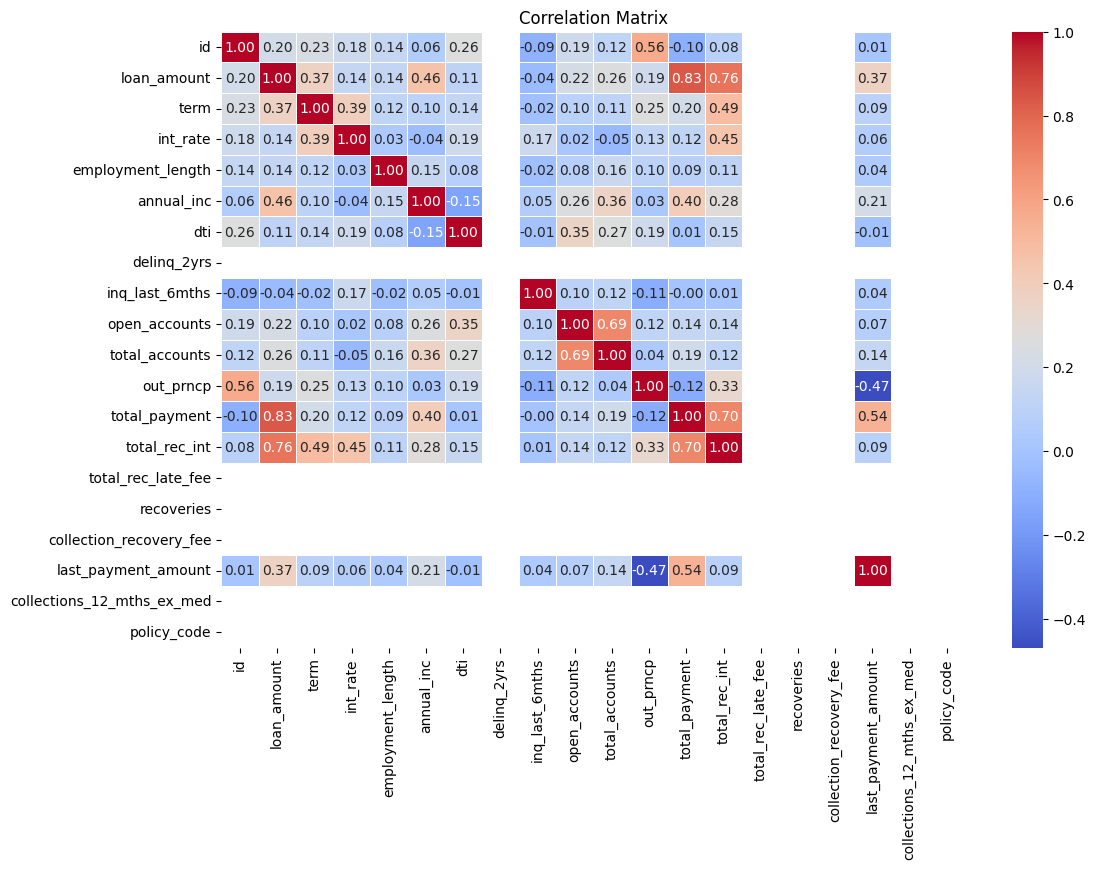

In [453]:
#visulatise cleaned df
plotter = Plotter(cleaned_df)
transformer = DataFrameTransform(cleaned_df)
correlation_matrix_cleaned = transformer.correlation_matrix()
plotter.plot_correlation_matrix(correlation_matrix_cleaned)

In [454]:
cleaned_df.to_csv("cleaned_data_m3_complete.csv", index=False)

In [ ]:
#Milestone 4. Task 1
# Percentage recovered = total_rec_int / (funded_amount + total_rec_int)

df_without_outliers['total_amount_to_be_paid'] = df_without_outliers['loan_amount'] + df_without_outliers['total_rec_int'] #funcded amount was highly correlated with loan amount so was removed
df_without_outliers['recovery_percentage'] = df_without_outliers['total_rec_int'] / df_without_outliers['total_amount_to_be_paid'] * 100
print(df_without_outliers['recovery_percentage'])
plotter.plot_histograms(['recovery_percentage'])

In [ ]:
# Remaining payments over the next 6 months = instalment * 6

df_without_outliers['remaining_payment_6_months'] = df_without_outliers['instalment'] * 6
print(df_without_outliers['remaining_payment_6_months'])
plotter.plot_histograms(['remaining_payment_6_months'])

In [473]:
#Task 2
charged_off_loans = df_without_outliers[df_without_outliers['loan_status'] == 'Charged Off']
charged_off_percentage = len(charged_off_loans) / len(df_without_outliers) * 100
total_paid_on_charged_off_loans = charged_off_loans['total_payment'].sum()
print(f"Percentage of Charged Off Loans: {charged_off_percentage:.2f}%")
print(f"Total Paid Towards Charged Off Loans: ${total_paid_on_charged_off_loans:,.2f}")

Percentage of Charged Off Loans: 3.80%
Total Paid Towards Charged Off Loans: $64,461.08


In [522]:
late_customers = skew_df[(skew_df['delinq_2yrs'] > 0)]
late_customers_percentage = len(late_customers) / len(skew_df) * 100
print(f"Percentage of Late Customers: {late_customers_percentage:.2f}%")

Percentage of Late Customers: 15.86%


In [523]:
total_late_customers_amount = late_customers['funded_amount'].sum()
print(f"Total Amount of Loans for Late Customers: ${total_late_customers_amount:,.2f}")
projected_loss_if_charged_off = late_customers['out_prncp'].sum()
print(f"Projected Loss if Late Customers are Charged Off: ${projected_loss_if_charged_off:,.2f}")
#sum of out_prncp and total_rec_int
projected_loss_full_term = late_customers['out_prncp'].sum() + late_customers['total_rec_int'].sum()
print(f"Projected Loss if Customers Finish Full Loan Term: ${projected_loss_full_term:,.2f}")

Total Amount of Loans for Late Customers: $720,759.93
Projected Loss if Late Customers are Charged Off: $16,041.81
Projected Loss if Customers Finish Full Loan Term: $164,328.31


In [520]:
total_expected_revenue = df_without_outliers['funded_amount'].sum() + df_without_outliers['total_rec_int'].sum()

total_at_risk = pd.concat([late_customers, charged_off_loans])
total_at_risk_revenue = total_at_risk['funded_amount'].sum() + total_at_risk['total_rec_int'].sum()
percentage_loss_of_total_revenue = (total_at_risk_revenue / total_expected_revenue) * 100
print(f"Percentage of Total Expected Revenue at Risk (Late + Charged Off): {percentage_loss_of_total_revenue:.2f}%")

Percentage of Total Expected Revenue at Risk (Late + Charged Off): 36.86%


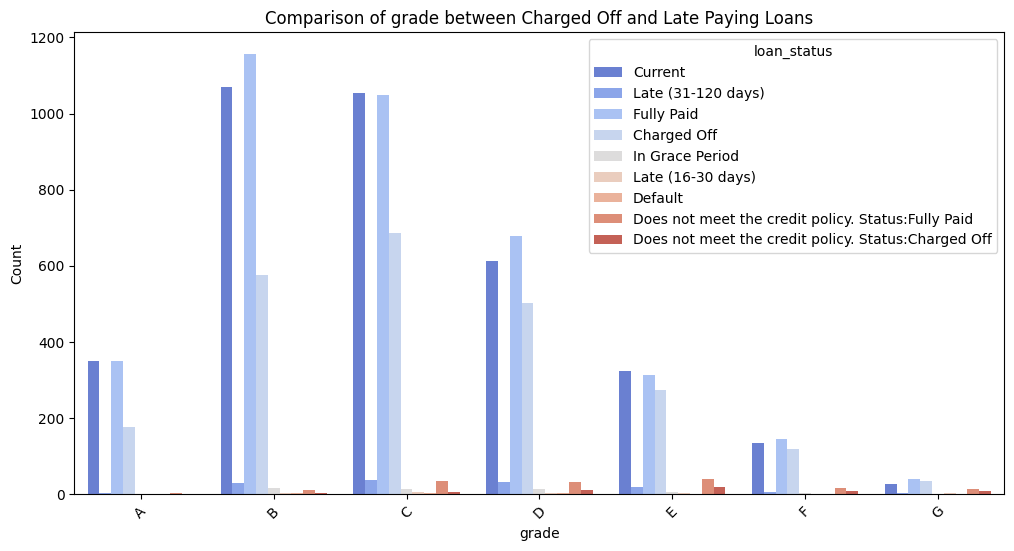

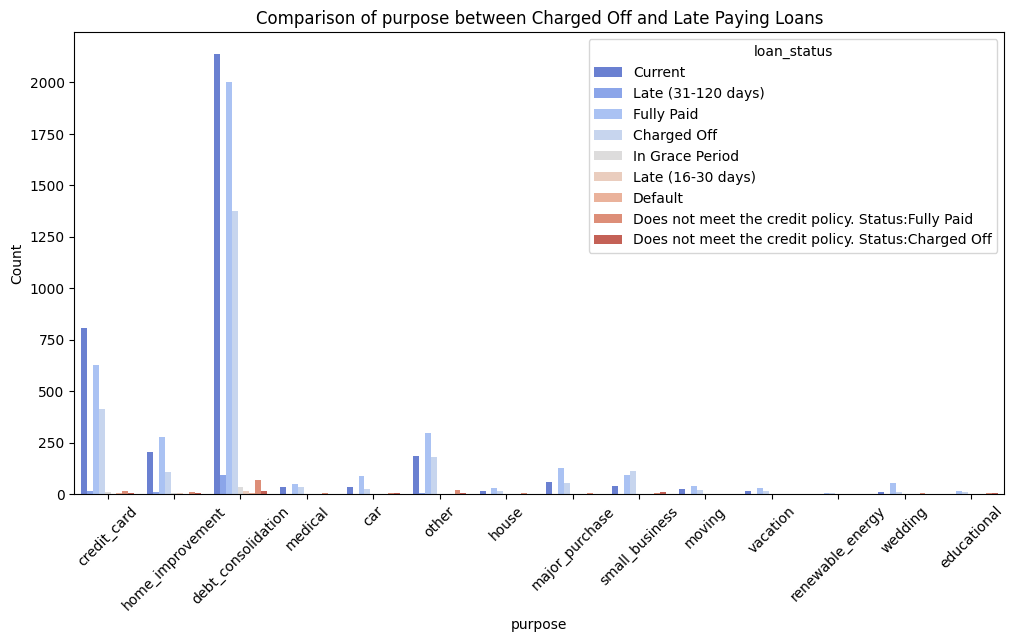

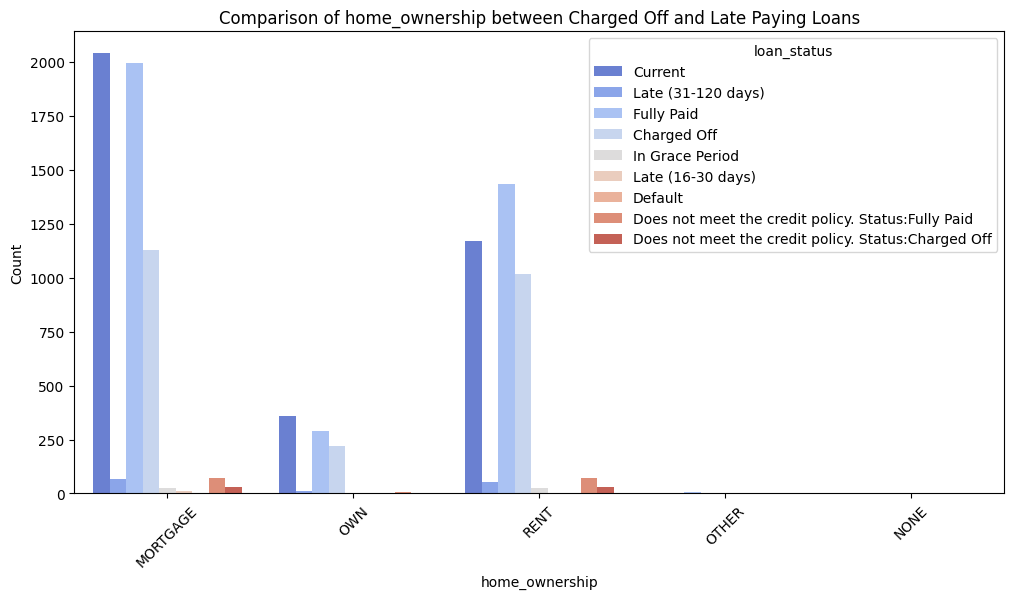

In [524]:
columns_of_interest = ['grade', 'purpose', 'home_ownership', 'annual_inc', 'dti', 'loan_amount', 'term']

def plot_categorical_comparison(column):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=total_at_risk, hue='loan_status', palette='coolwarm')
    plt.title(f'Comparison of {column} between Charged Off and Late Paying Loans')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

for column in columns_of_interest:
    if total_at_risk[column].dtype == 'object':  # categorical columns
        plot_categorical_comparison(column)

C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1747684987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=total_at_risk, palette='coolwarm')


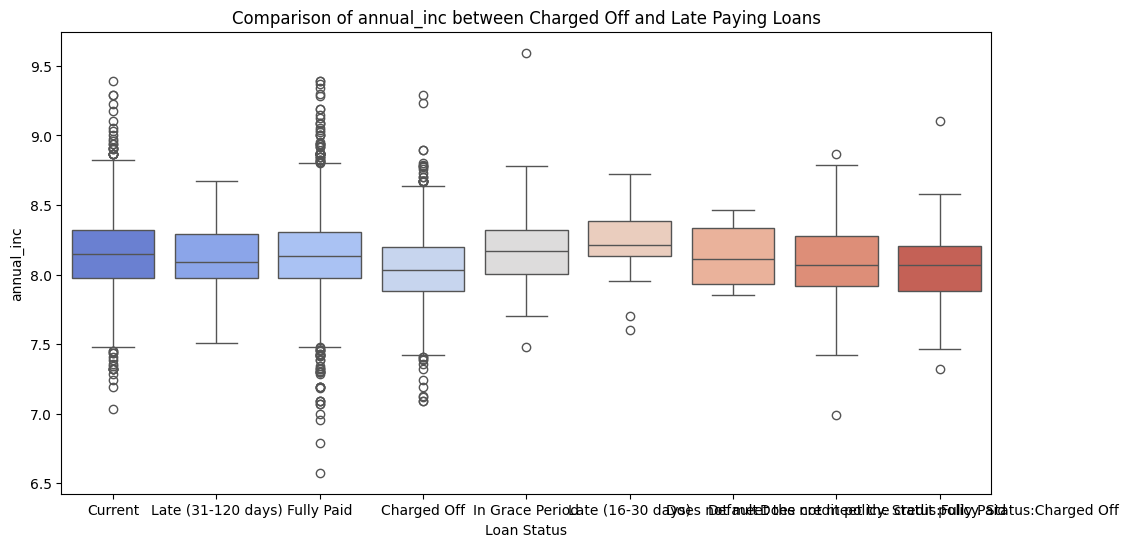

C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1747684987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=total_at_risk, palette='coolwarm')


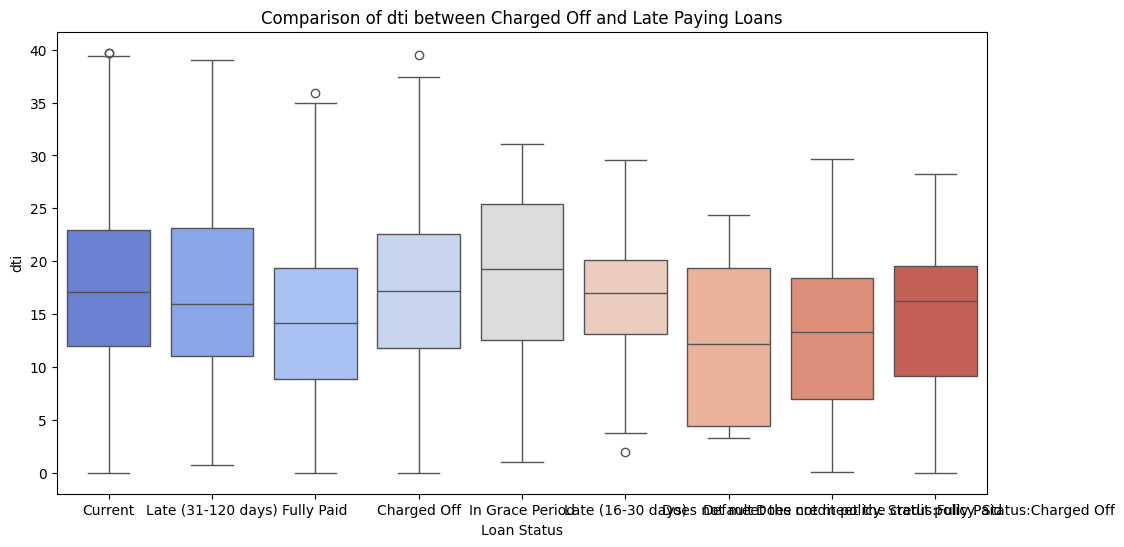

C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1747684987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=total_at_risk, palette='coolwarm')


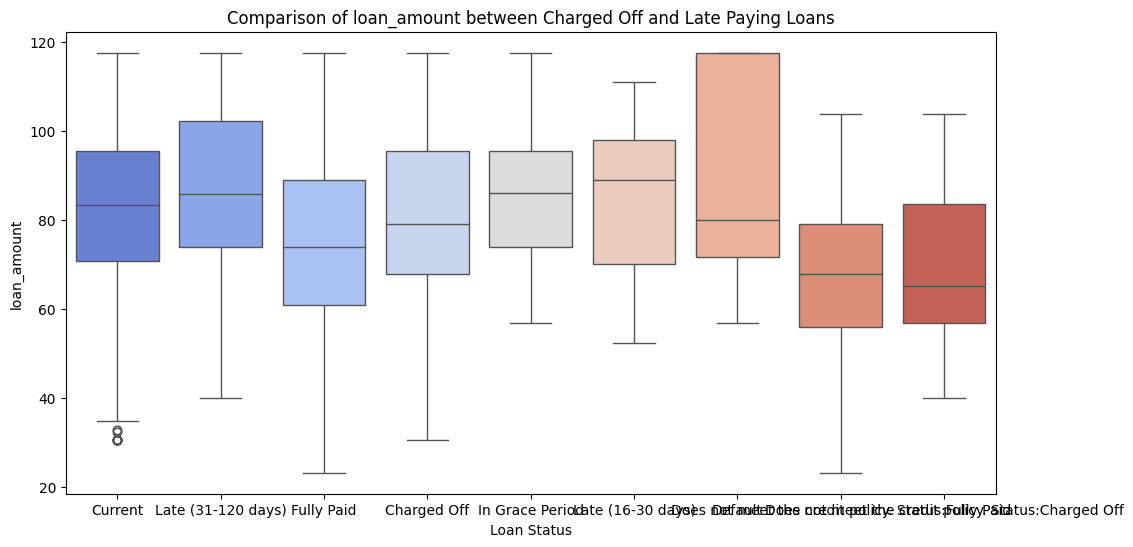

C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1747684987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=total_at_risk, palette='coolwarm')


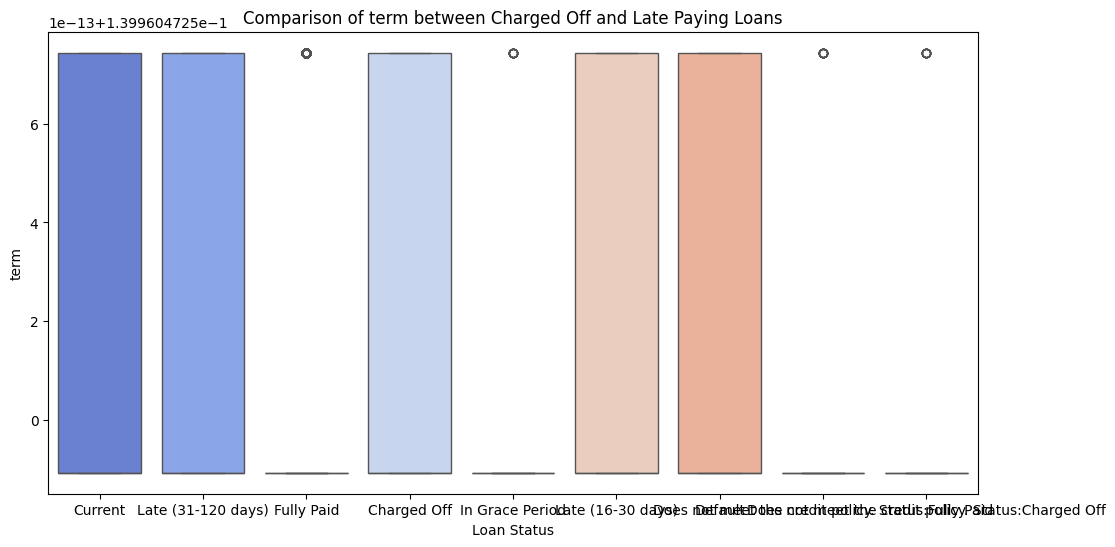

In [525]:
def plot_numeric_comparison(column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='loan_status', y=column, data=total_at_risk, palette='coolwarm')
    plt.title(f'Comparison of {column} between Charged Off and Late Paying Loans')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()

numeric_columns = ['annual_inc', 'dti', 'loan_amount', 'term']
for column in numeric_columns:
    plot_numeric_comparison(column)

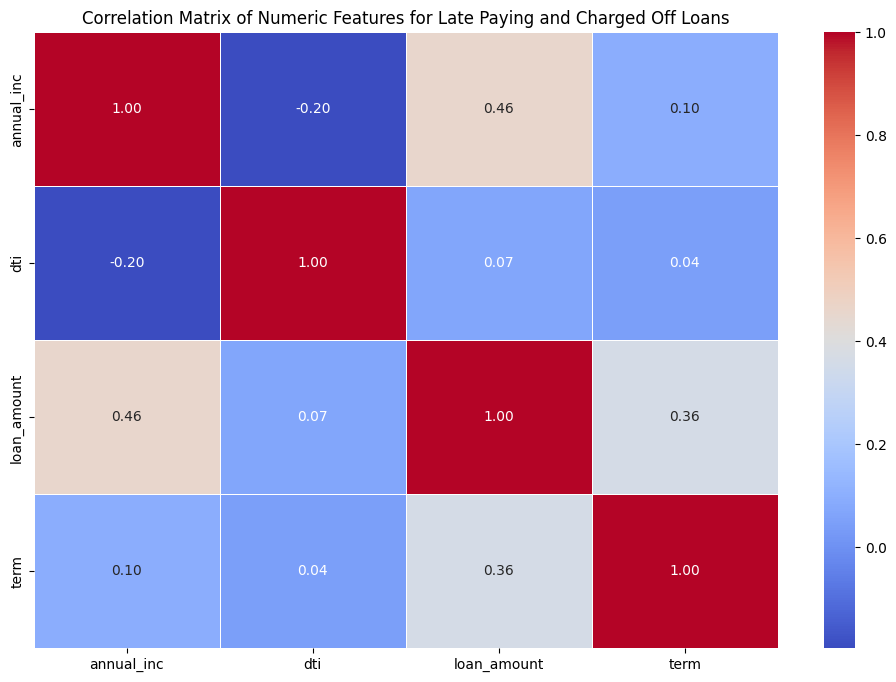

In [527]:
correlation_matrix = total_at_risk[columns_of_interest].select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features for Late Paying and Charged Off Loans")
plt.show()

In [528]:
charged_or_late_summary = total_at_risk.groupby('loan_status')[columns_of_interest].describe()

print(charged_or_late_summary)

                                                   annual_inc            \
                                                        count      mean   
loan_status                                                               
Charged Off                                            2371.0  8.040769   
Current                                                3569.0  8.153582   
Default                                                   9.0  8.152179   
Does not meet the credit policy. Status:Charged...       57.0  8.059888   
Does not meet the credit policy. Status:Fully Paid      150.0  8.090034   
Fully Paid                                             3730.0  8.133546   
In Grace Period                                          54.0  8.181752   
Late (16-30 days)                                        20.0  8.222749   
Late (31-120 days)                                      128.0  8.127199   

                                                                        \
                         